In [1]:
import yaml
import torch
from data import CellDataset, showSample
from torch.utils.data import DataLoader
from utils import calc_mIoU, Logger, create_path, import_mod

### load hyper parameter
with open("./config/config.yaml")as f:
    args = yaml.load(f)
    args['batch_size'] = 1
    log_file = "logs/" + args["model"] + "/log.txt"
    params_file = "params/" + args["model"] + "/params.ckpt"
    logger = Logger(log_file)

    
### load eval dataset
eval_dataset = CellDataset(train=False, size=args["image_size"])
eval_loader = DataLoader(dataset=eval_dataset, batch_size=args['batch_size'], shuffle=False)

### load device --- cpu or gpu
device = torch.device('cuda:0') if args["device"]=="gpu" else torch.device('cpu')

### load model
model = import_mod("model." + args["model"])
model = model().to(device)
model.load_state_dict(torch.load(params_file))
# model.eval()

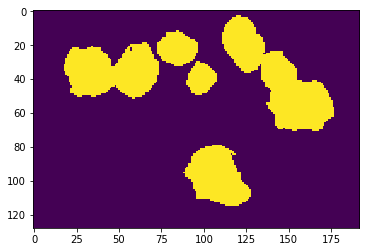

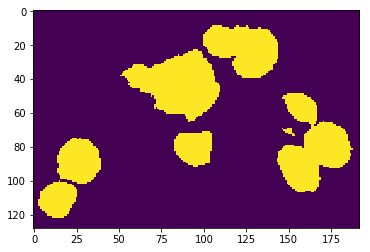

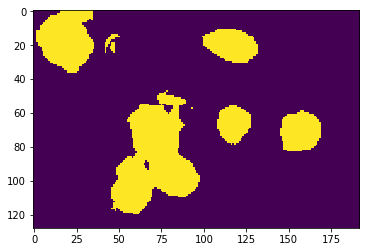

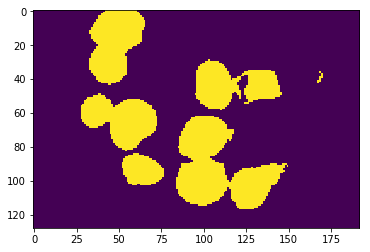

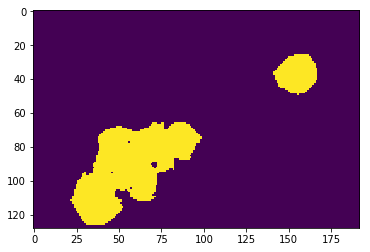

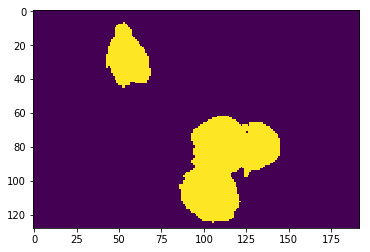

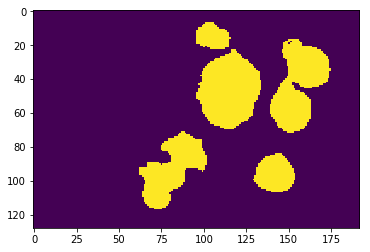

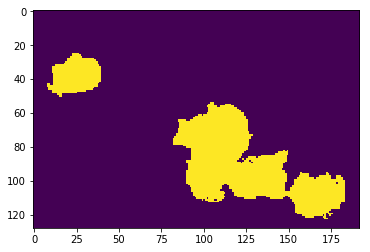

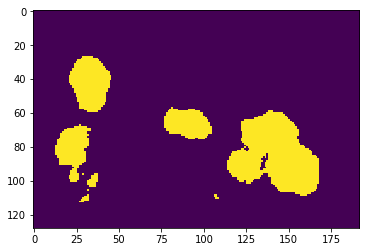

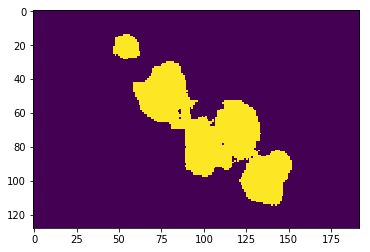

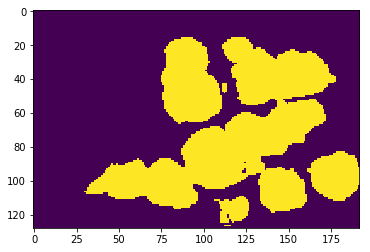

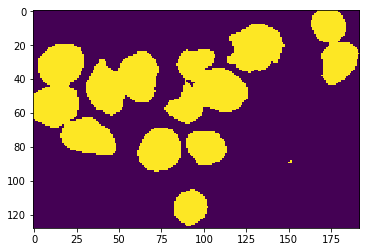

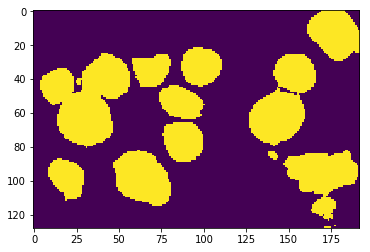

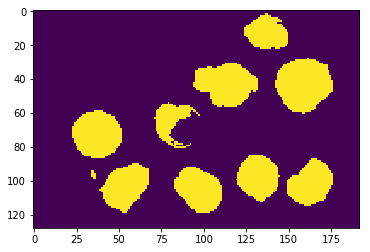

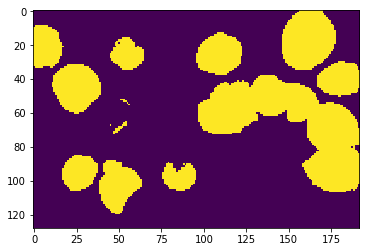

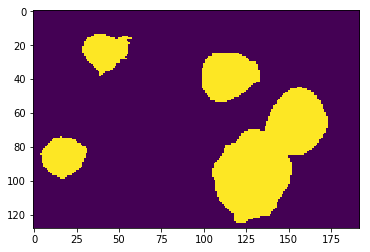

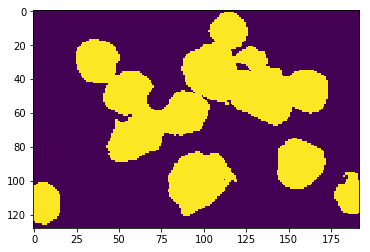

In [12]:
total_mIoU = 0
for i, (inputs, targets) in enumerate(eval_loader):
    inputs = inputs.to(device)
    targets = targets.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    save_name = "./data/result/" + str(i) + ".npy"
    preds = preds.cpu().numpy().squeeze()
    preds[preds == 1] = 255
    import matplotlib.pyplot as plt
    np.save()